In [2]:
import pandas as pd
import numpy as np

In [40]:

data=pd.read_csv("../raw_data/trainset_full.csv")

In [6]:
data

index  turbine_id                measured_at  wind_speed     power  \
0              0          11  2020-01-01 00:00:00+00:00    0.433333  0.121250   
1              1          11  2020-01-01 00:10:00+00:00    0.458333  0.138750   
2              2          11  2020-01-01 00:20:00+00:00    0.508333  0.182950   
3              3          11  2020-01-01 00:30:00+00:00    0.525000  0.218100   
4              4          11  2020-01-01 00:40:00+00:00    0.541667  0.234300   
...          ...         ...                        ...         ...       ...   
1367185  1367185          29  2021-04-30 22:10:00+00:00    0.253846  0.004242   
1367186  1367186          29  2021-04-30 22:20:00+00:00    0.261538  0.007152   
1367187  1367187          29  2021-04-30 22:30:00+00:00    0.261538  0.007970   
1367188  1367188          29  2021-04-30 22:40:00+00:00    0.307692  0.030394   
1367189  1367189          29  2021-04-30 22:50:00+00:00    0.361538  0.055182   

         nacelle_direction  wind_direction  rotor_speed  generator_speed  \
0                    266.0           266.3     0.677852         0.569444   
1                    266.6           267.0     0.704698         0.591766   
2                    270.7           269.4     0.771812         0.647321   
3                    272.1           272.7     0.805369         0.676091   
4                    279.5           281.1     0.832215         0.700397   
...                    ...             ...          ...              ...   
1367185               64.9            65.9     0.525000         0.468333   
1367186               64.9            68.5     0.525000         0.466733   
1367187               64.9            65.2     0.525000         0.466733   
1367188               64.9            62.1     0.525000         0.468933   
1367189               64.9            63.3     0.575000         0.516467   

         temp_environment  temp_hydraulic_oil  temp_gear_bearing  cosphi  \
0                       5                  20                 32    0.85   
1                       5                  20                 33    0.88   
2                       5                  20                 34    0.92   
3                       5                  20                 38    0.94   
4                       5                  20                 41    0.95   
...                   ...                 ...                ...     ...   
1367185                12                  42                 53    0.60   
1367186                11                  42                 53    0.90   
1367187                11                  43                 54    0.90   
1367188                11                  43                 55    1.00   
1367189                11                  43                 56    1.00   

         blade_angle_avg  hydraulic_pressure  park_id error_category  
0                   -1.9               189.2        1       NO_ERROR  
1                   -2.0               189.5        1       NO_ERROR  
2                   -2.0               190.1        1       NO_ERROR  
3                   -2.0               190.0        1       NO_ERROR  
4                   -2.0               189.9        1       NO_ERROR  
...                  ...                 ...      ...            ...  
1367185             -1.7               247.2        2       NO_ERROR  
1367186             -1.8               246.8        2       NO_ERROR  
1367187             -1.7               247.0        2       NO_ERROR  
1367188             -2.5               246.9        2       NO_ERROR  
1367189             -2.8               246.9        2       NO_ERROR  

[1367190 rows x 17 columns]

# General

In total got 1367190 entries. 

index column is not important -> not used
park_id column is redundant since the turbine_id contains all information about the location of the turbine -> not used

measured_at can be used as an identifier together with the turbine_id


### Error codes

There are 18 different states in error_category, one of them being no error.
For some error categories there is barely any data available.

In [21]:
data.error_category.value_counts()


NO_ERROR    1272609
ERROR=12      47724
ERROR=17      21651
ERROR=3       10224
ERROR=5        4893
ERROR=19       3743
ERROR=24       1771
ERROR=28       1494
ERROR=8        1081
ERROR=20        787
ERROR=31        495
ERROR=30        409
ERROR=22        141
ERROR=25        108
ERROR=7          32
ERROR=27         22
ERROR=29          4
ERROR=23          2
Name: error_category, dtype: int64

In [29]:
data = data.drop(columns=['index', 'park_id', 'measured_at', 'turbine_id'])

## Features 

There are 12 features that can be used to predict the error_category:

wind_speed, power, nacelle_direction, wind_direction, rotor_speed, generator_speed, temp_environment, temp_hydraulic_oil, temp_gear_bearing, cosphi, blade_angle_avg, hydraulic_pressure


wind_speed and generator_speed asre highly correlated. Might drop 1 to reduce complexity.


Additionally, there is some correlation between the turbine_id and the error_category (faulty turbines?). Can be used as feature but only if there are the same turbines in the hidden set

In [34]:
features = data.drop(columns=['error_category'])

array([[<AxesSubplot:xlabel='wind_speed', ylabel='wind_speed'>,
        <AxesSubplot:xlabel='power', ylabel='wind_speed'>,
        <AxesSubplot:xlabel='nacelle_direction', ylabel='wind_speed'>,
        <AxesSubplot:xlabel='wind_direction', ylabel='wind_speed'>,
        <AxesSubplot:xlabel='rotor_speed', ylabel='wind_speed'>,
        <AxesSubplot:xlabel='generator_speed', ylabel='wind_speed'>,
        <AxesSubplot:xlabel='temp_environment', ylabel='wind_speed'>,
        <AxesSubplot:xlabel='temp_hydraulic_oil', ylabel='wind_speed'>,
        <AxesSubplot:xlabel='temp_gear_bearing', ylabel='wind_speed'>,
        <AxesSubplot:xlabel='cosphi', ylabel='wind_speed'>,
        <AxesSubplot:xlabel='blade_angle_avg', ylabel='wind_speed'>,
        <AxesSubplot:xlabel='hydraulic_pressure', ylabel='wind_speed'>],
       [<AxesSubplot:xlabel='wind_speed', ylabel='power'>,
        <AxesSubplot:xlabel='power', ylabel='power'>,
        <AxesSubplot:xlabel='nacelle_direction', ylabel='power'>,
        <A

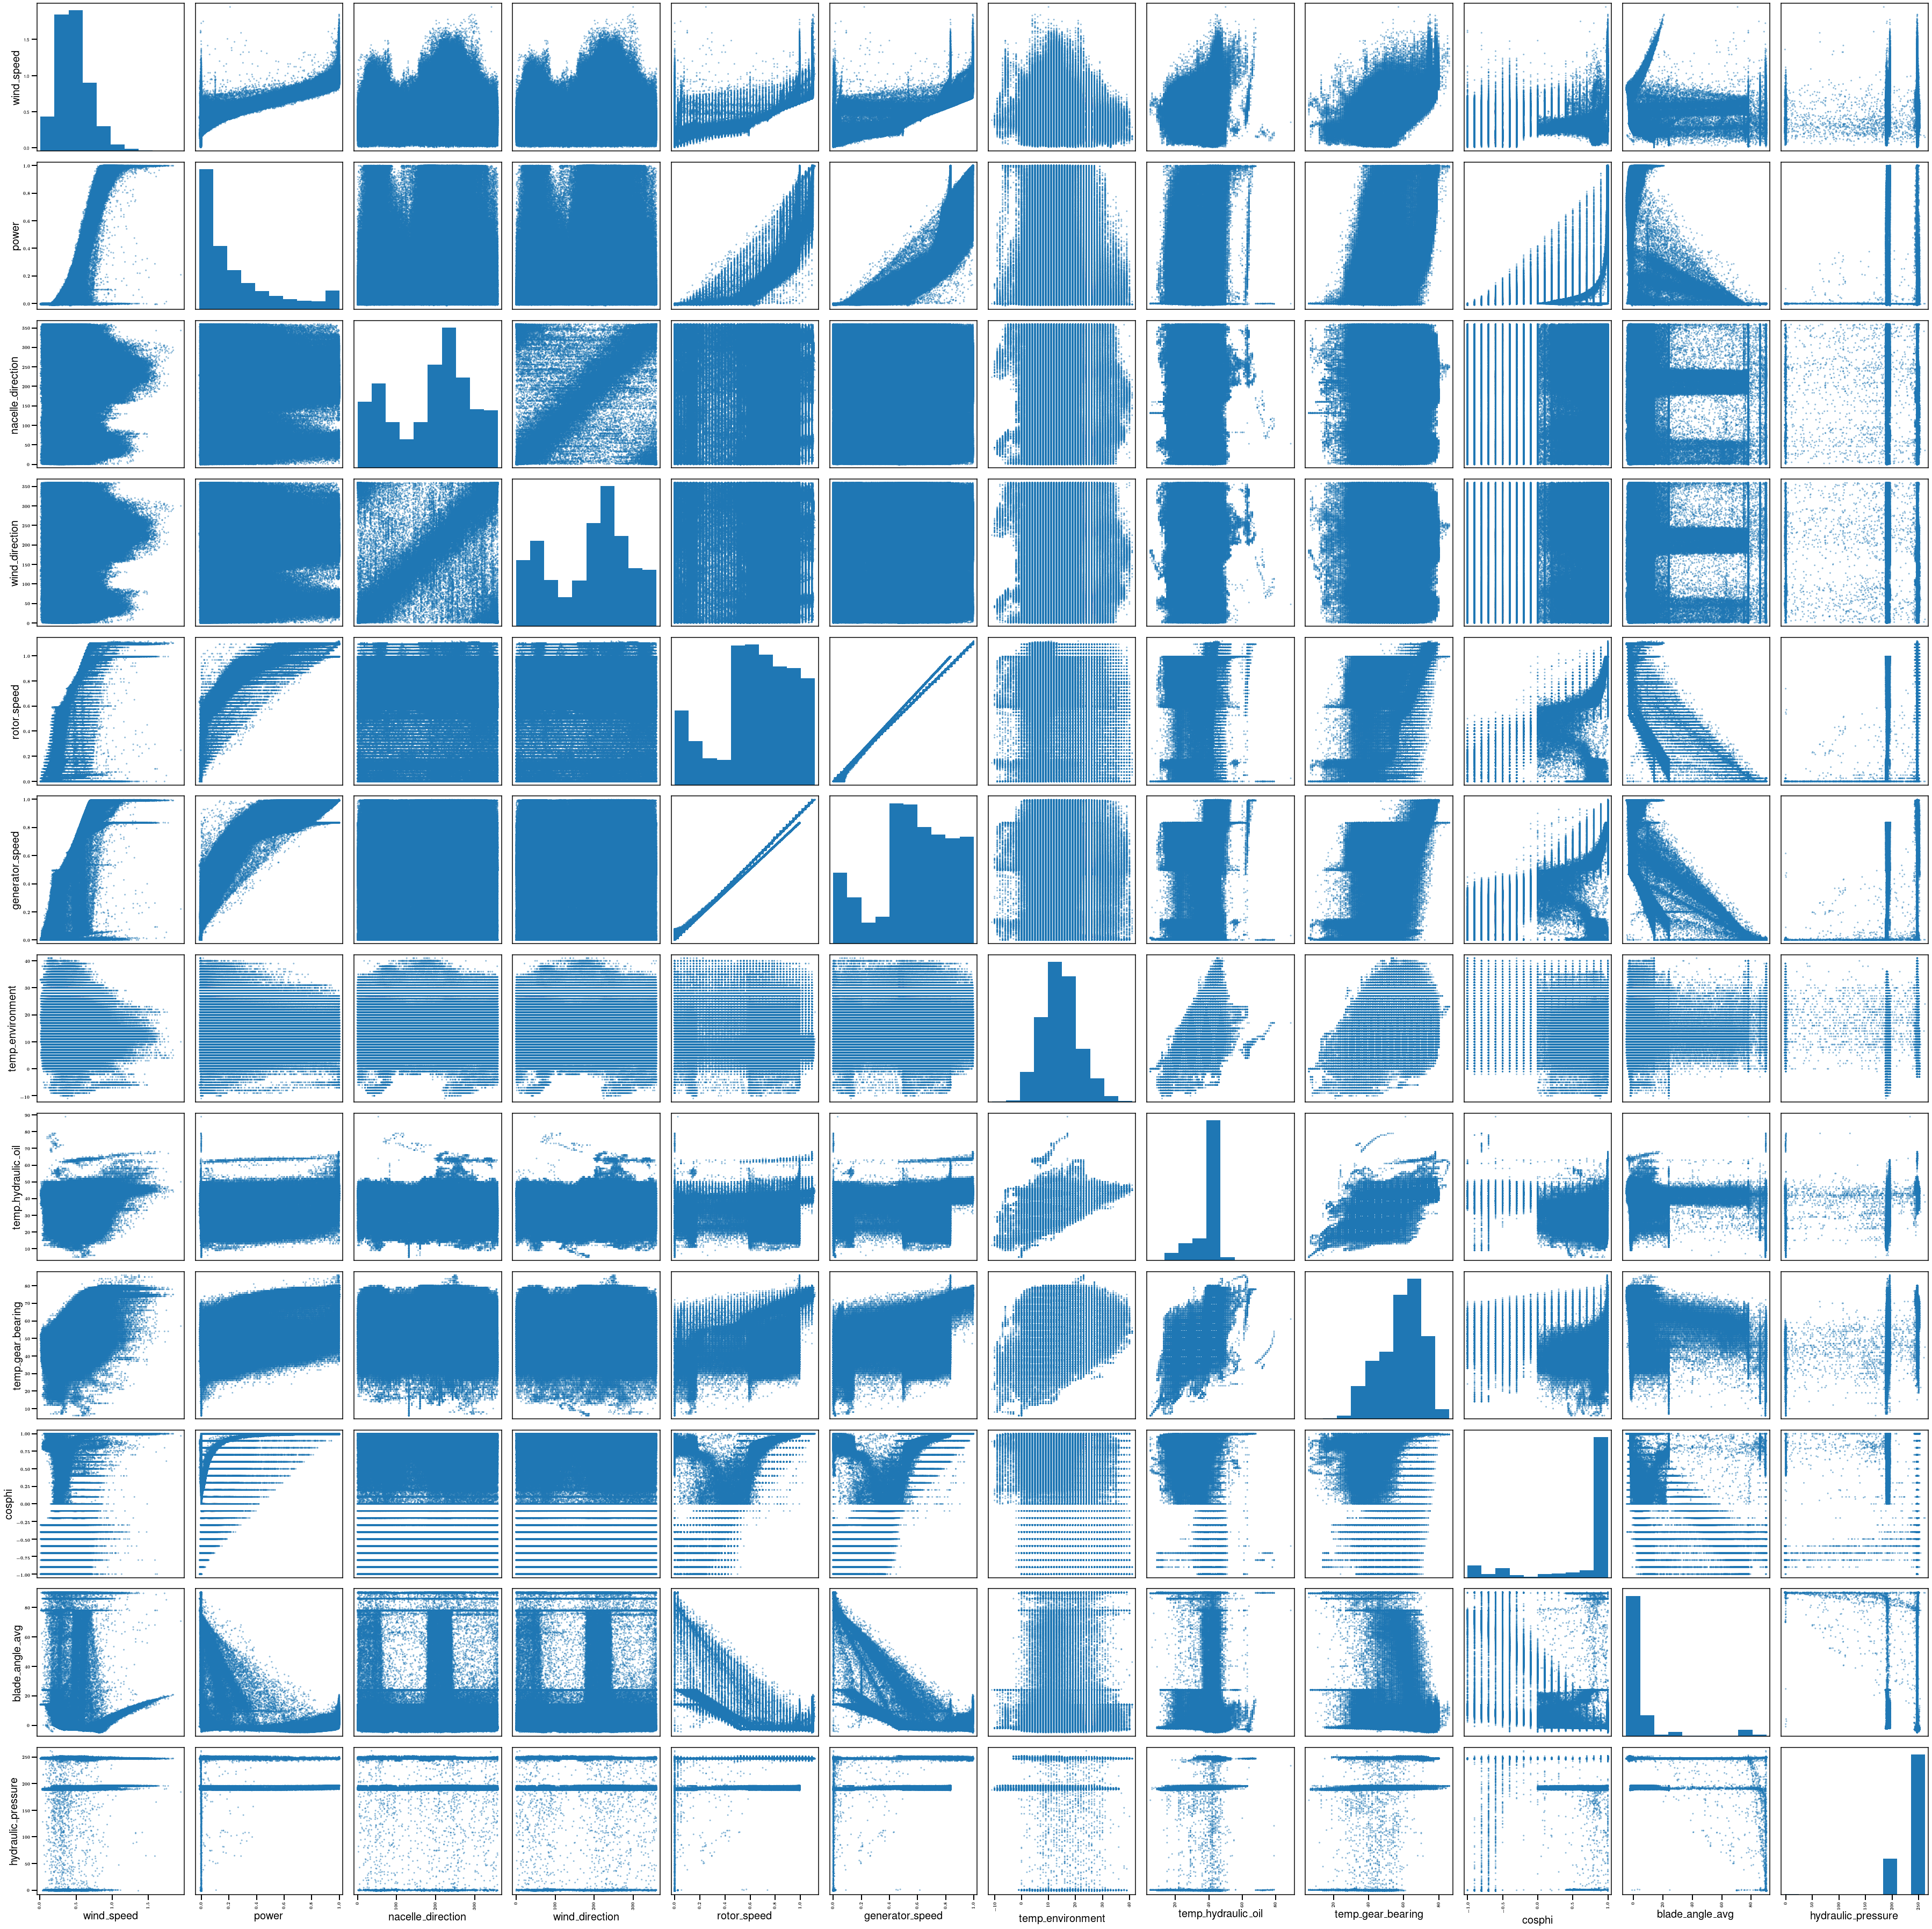

In [37]:
pd.plotting.scatter_matrix(features, figsize=(50, 50))


## Correlation between individual features and error codes

If error => Rotorspeed is low and generator speed also very low.

If cosphi is high -> often no error

bladeangle is low -> no error



Code 5: High Power & high wind speed -> Probably overuse
Code 19: correlated with high pressure

# Encode temporal data

moving filter + large batches


In [77]:
import matplotlib.pyplot as plt
feature_names = ['wind_speed', 'power', 'nacelle_direction', 'wind_direction', 'rotor_speed', 'generator_speed', 'temp_environment', 'temp_hydraulic_oil', 'temp_gear_bearing', 'cosphi', 'blade_angle_avg', 'hydraulic_pressure']

error_categories = np.unique(data.error_category)
import seaborn as sns
color_palette = sns.color_palette('husl', n_colors=len(error_categories))
print(error_categories)
color_palette


['ERROR=12' 'ERROR=17' 'ERROR=19' 'ERROR=20' 'ERROR=22' 'ERROR=23'
 'ERROR=24' 'ERROR=25' 'ERROR=27' 'ERROR=28' 'ERROR=29' 'ERROR=3'
 'ERROR=30' 'ERROR=31' 'ERROR=5' 'ERROR=7' 'ERROR=8' 'NO_ERROR']


[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9707505829046977, 0.4626541987597626, 0.26486329418330007),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.5310702086647983, 0.6569113639885688, 0.1931838276161326),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.1998437102815942, 0.6927711055021983, 0.4485948481767363),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.22126158707091403, 0.6600977737826563, 0.7915486637100363),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.5392573577708815, 0.5821140171749066, 0.9584212824085171),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371),
 (0.9648889414626248, 0.41896694790705413, 0.692031255809005)]

In [100]:
import copy
plot_data = copy.deepcopy(data)
plot_data["date"] = pd.to_datetime(plot_data["measured_at"])
plot_data = plot_data.sort_values(by="date")

ValueError: where size (69613) does not match x size (1367190)

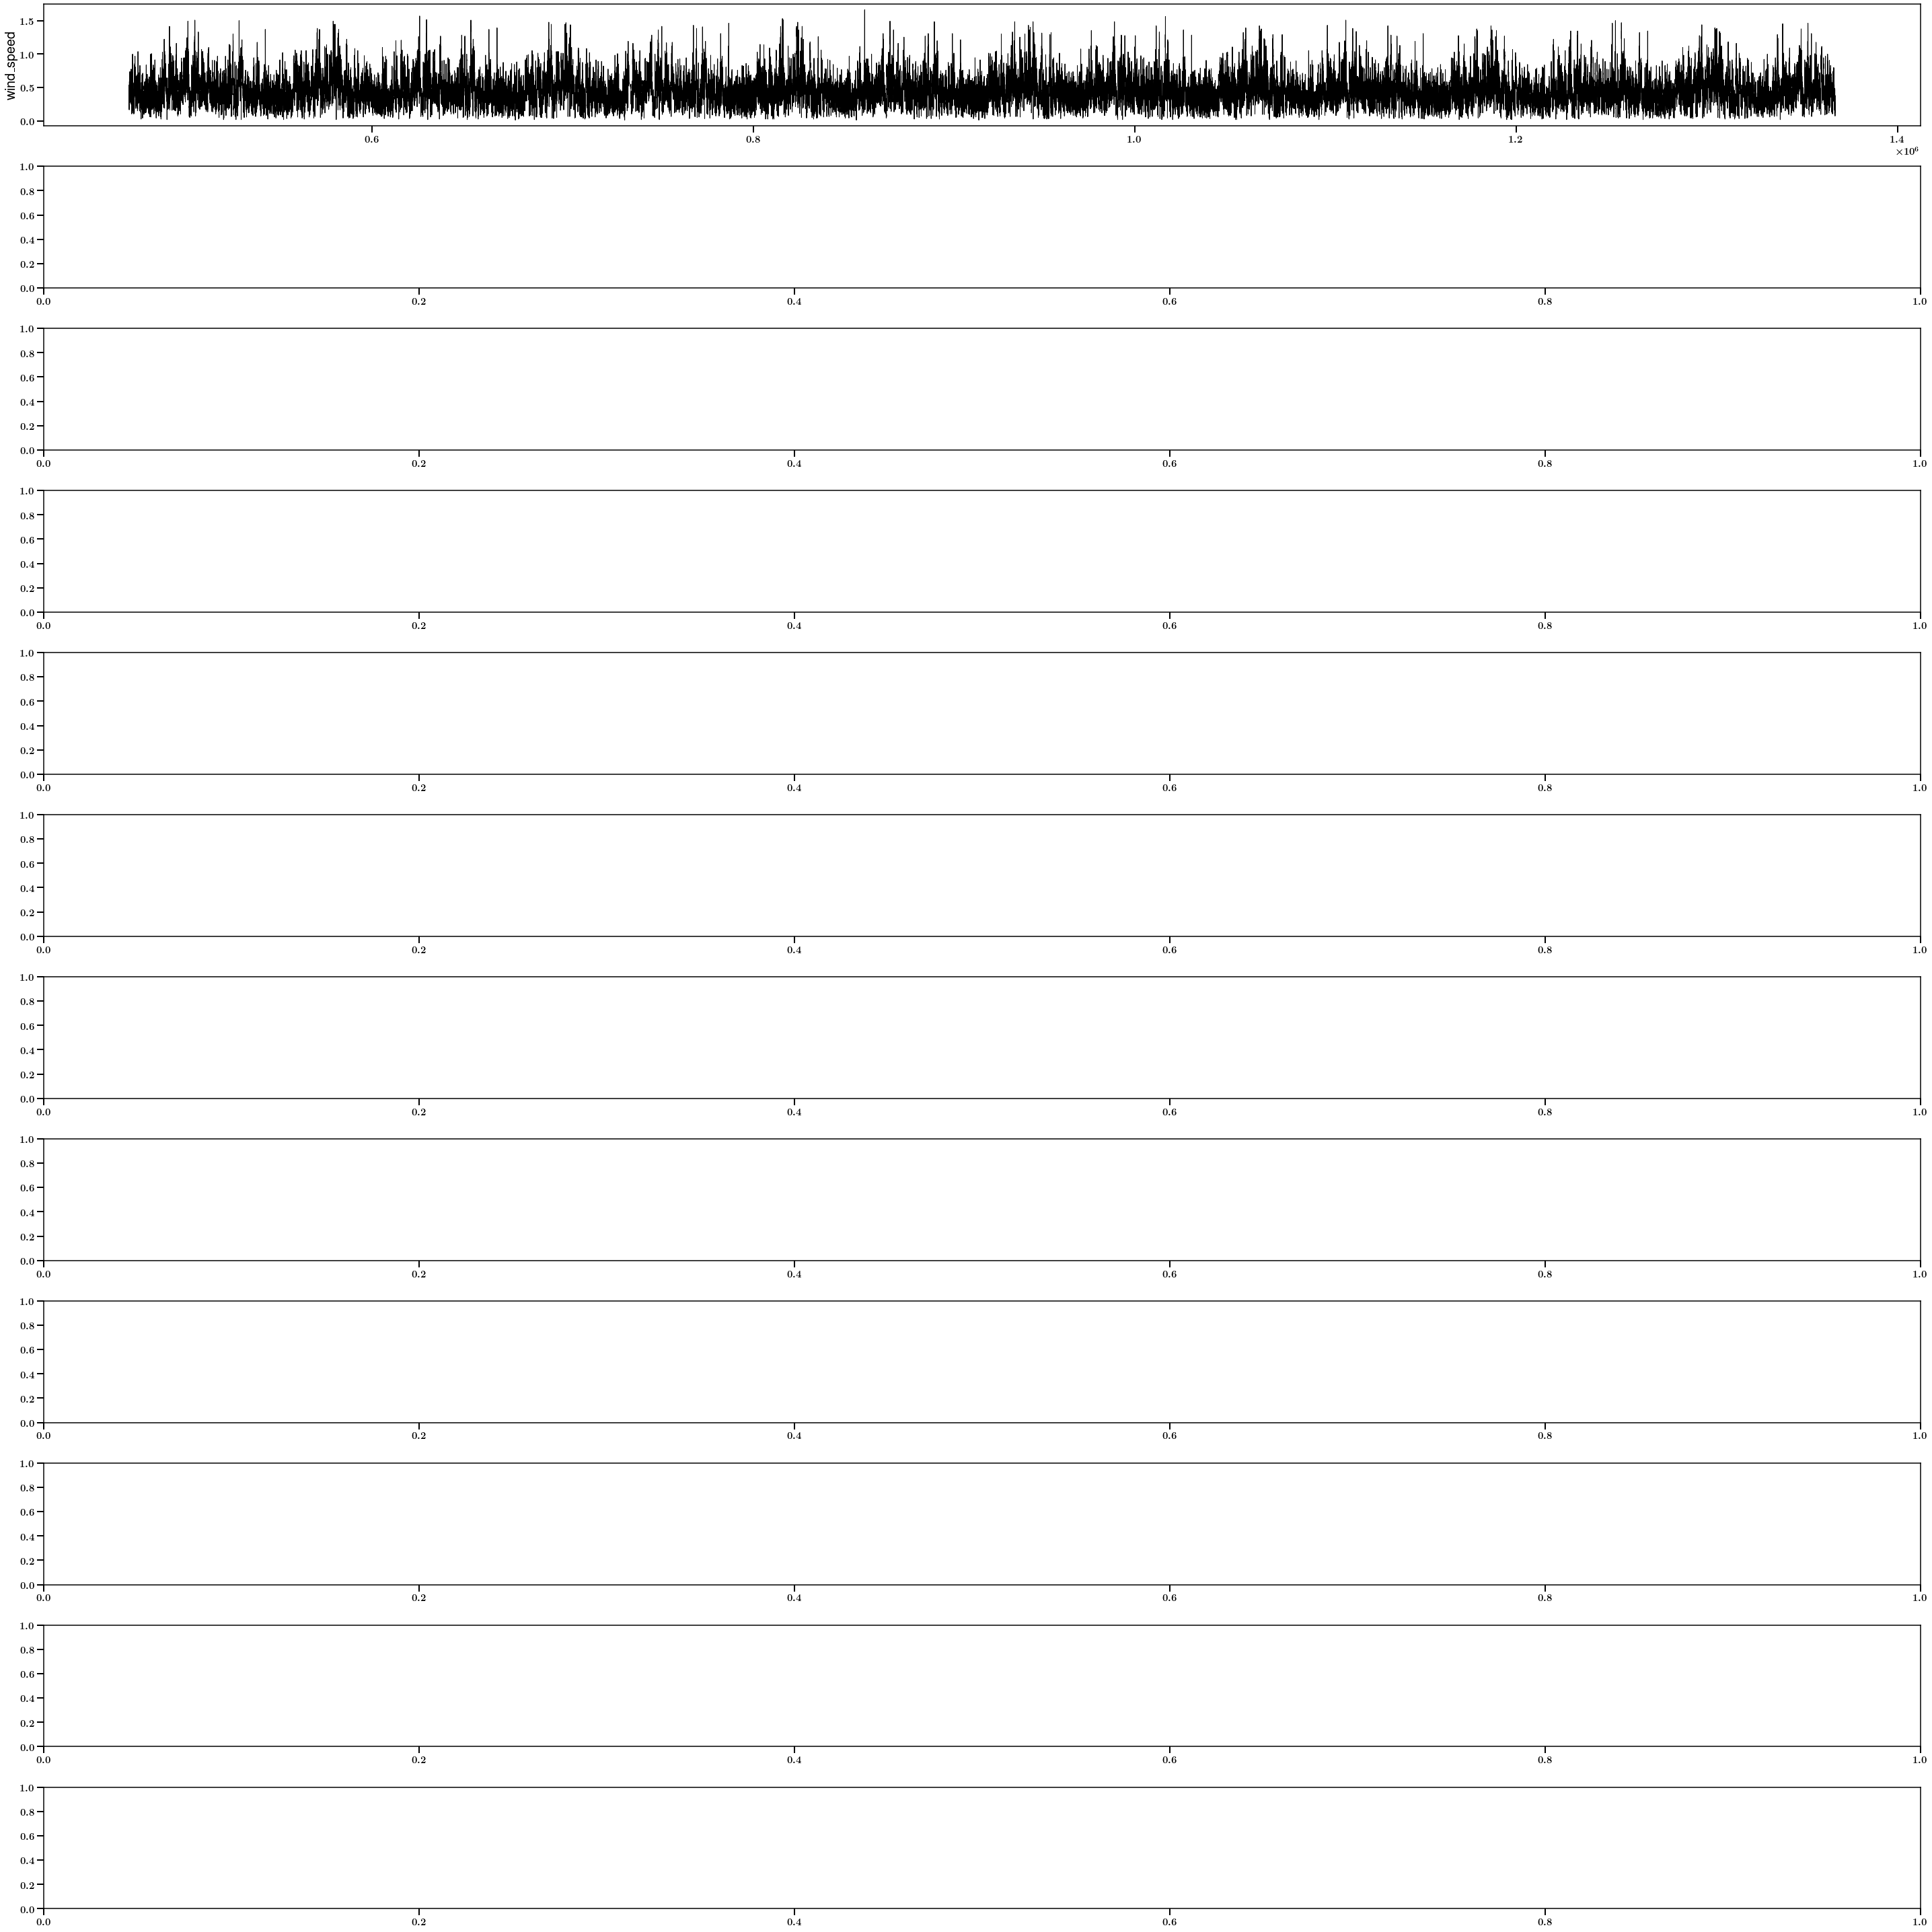

In [110]:
fig, ax = plt.subplots(ncols=1, nrows=len(feature_names), figsize=(40, 40))
for idf, f in enumerate(feature_names):
    
    ids = np.where(plot_data.turbine_id == 11)[0]

    ax[idf].plot(plot_data[f][ids], color='k')
    ax[idf].set_ylabel(f)
    x = np.arange(len(ids))
    for ie, e in enumerate(error_categories):
        if e == 'NO_ERROR':
            continue
        ax[idf].fill_between(x, np.min(plot_data[f][ids]), np.max(plot_data[f][ids]), where=plot_data.error_category[ids] == e, color=color_palette[ie], alpha=0.5)
    # ticks = ax[idf].get_xticks()
    # ticks = ticks[ticks >= 0]
    # ax[idf].set_xticks(ticks)
    # ticks = ax[idf].get_xticks()
    # ticks = ticks[ticks >= 0]
    # ticks = ticks.astype(int)
    # year = pd.to_datetime(plot_data.measured_at[ids])[ticks].dt.year
    # month = pd.to_datetime(plot_data.measured_at[ids])[ticks].dt.month
    # new_ticks = [f"{m} / {y}" for m , y in zip(month, year)]
    # ax[idf].set_xticklabels(new_ticks)
ax[0].set_title(f"Turbine {11}")


# Questions

Does the new data contain turbines with different IDs? If yes do not use turbine_id although it has some correlation with the error_category

Are test datas from the same windparks?

Is test data from another year?

Can output be a probability or just categorical?